In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from matplotlib import pyplot as plt
import numpy

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [43]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record solution and update guess
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If fails return truncated list of parameters and x_values
            return param_list[:len(X)], X
        
    return param_list, X

In [83]:
def F(x, lmbda):
    return lmbda*x - x**3

In [89]:
# Find Bifurcations
domain = np.flip(np.linspace(-5,5,200))
C1, X1 = EmbeddingAlg(domain, np.sqrt(5),F)
C2, X2 = EmbeddingAlg(domain, -np.sqrt(5),F)
C3, X3 = EmbeddingAlg(domain, 0,F)

(-3.0, 3.0)

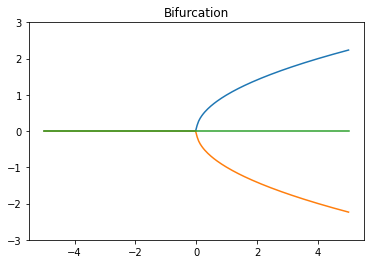

In [92]:
# Plot
plt.plot(C1,X1)
plt.plot(C2,X2)
plt.plot(C3,X3)
plt.title("Bifurcation")
plt.ylim(-3,3)

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

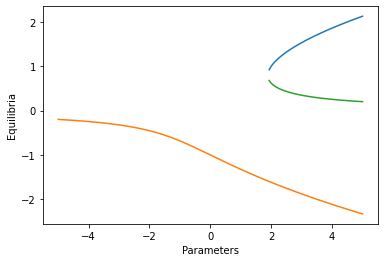

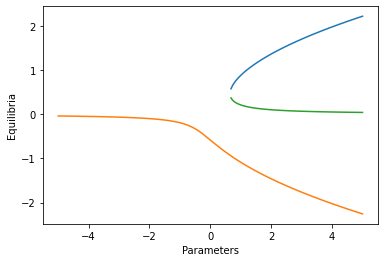

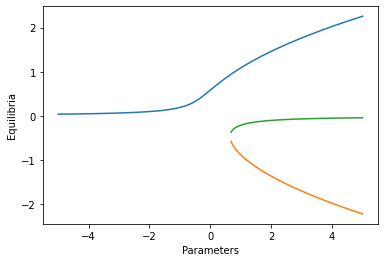

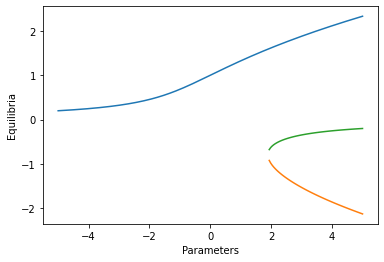

In [50]:
# Set up
etas = [-1, -.2, .2, 1]
domain = np.flip(np.linspace(-5,5,200))
for eta in etas:
    
    # Define function
    def F(x, lmbda):
        return eta + lmbda*x - x**3
    
    # Find Bifurcations
    C1, X1 = EmbeddingAlg(domain, np.sqrt(5),F)
    C2, X2 = EmbeddingAlg(domain, -np.sqrt(5),F)
    C3, X3 = EmbeddingAlg(domain, 0,F)
    
    # Plot it
    plt.plot(C1,X1)
    plt.plot(C2,X2)
    plt.plot(C3,X3)
    plt.xlabel("Parameters")
    plt.ylabel("Equilibria")
    plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

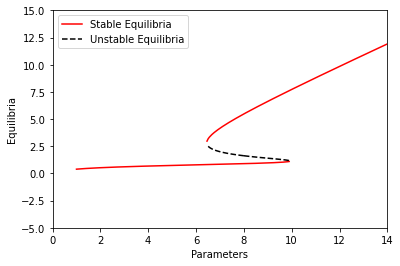

In [73]:
def F(x,k):
    r = .56
    return r*x*(1-x/k) - x**2/(1+x**2)

# Set my domains
domain1 = np.linspace(1,11,200)
domain2, domain2b = np.linspace(8,12,100), np.linspace(8,4,100)
domain3 = np.flip(np.linspace(5,15,200))

# Find my bifurcations
C1, X1 = EmbeddingAlg(domain1, .2,F)
C2, X2 = EmbeddingAlg(domain2, 2,F)
C2b,X2b= EmbeddingAlg(domain2b,2,F)
C3, X3 = EmbeddingAlg(domain3, 13,F)

# Plot it
plt.plot(C1,X1,color='r',label="Stable Equilibria")
plt.plot(C2,X2,'--',color='k',label="Unstable Equilibria")
plt.plot(C2b,X2b,'--',color='k')
plt.plot(C3,X3,color='r')
plt.xlabel("Parameters")
plt.ylabel("Equilibria")
plt.xlim(0,14)
plt.ylim(-5,15)
plt.legend()
plt.title("Bifurcation Diagram")
plt.show()